<a href="https://colab.research.google.com/github/aishanids/3354-git/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set the path
path = '/content/drive/MyDrive/AI and ML in Business Applications - UT Austin McCombs School of Business/Python Foundations/Project 1: FoodHub Data Analysis/foodhub_order.csv'
# read the data
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1,898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three different data types of the different columns in the dataset: float64 which is a numeric float value, int64 which is a numeric integer value, and object which are mainly string objects in this data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
#Check if there are any missing values in the data and sum them up
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing data, so no treatment for missing data is required.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Return the statistical summary of the 'food_preparation_time' data
df.describe().food_preparation_time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
According to the statisitical summary of the 'food_preparation_time' data, the minimum time it takes for food to be prepared once an order is placed is 20, the average time is 27.371970, and the maximum time is 35.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Return the count of all the unique values of rating data
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders not rated in the data.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

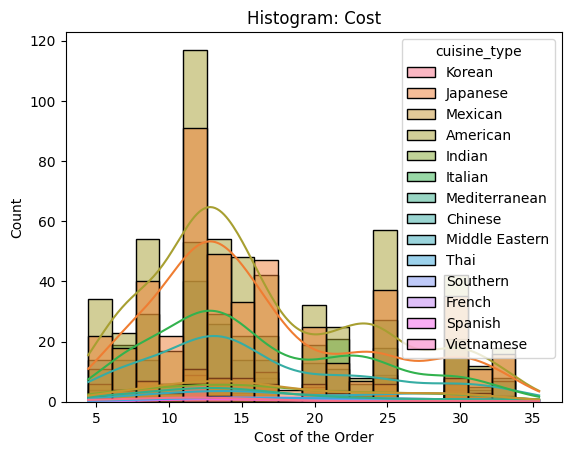

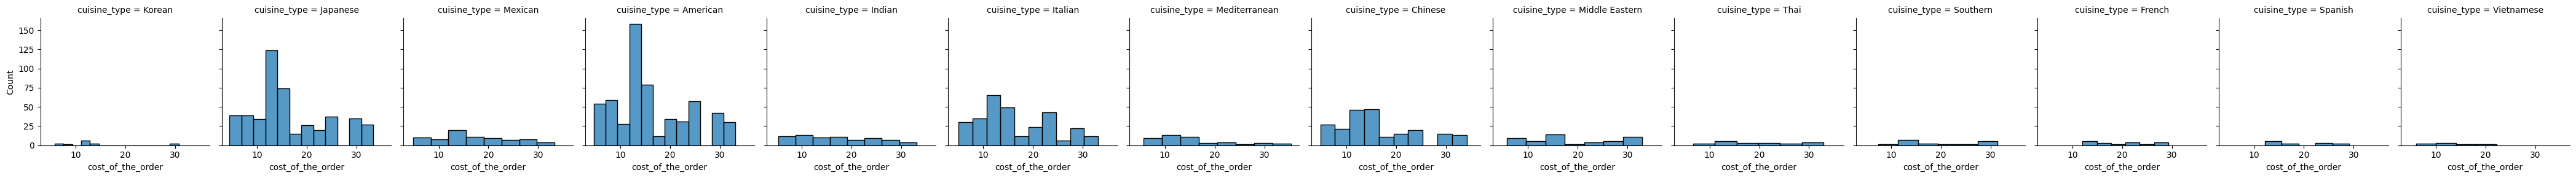

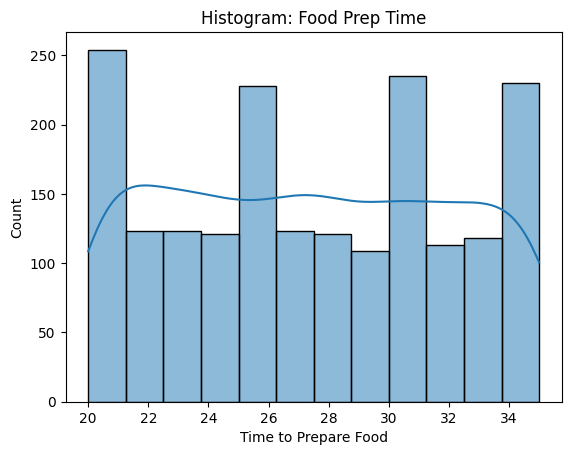

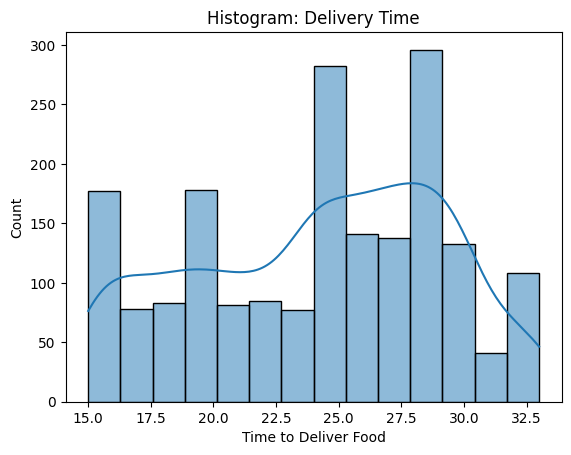

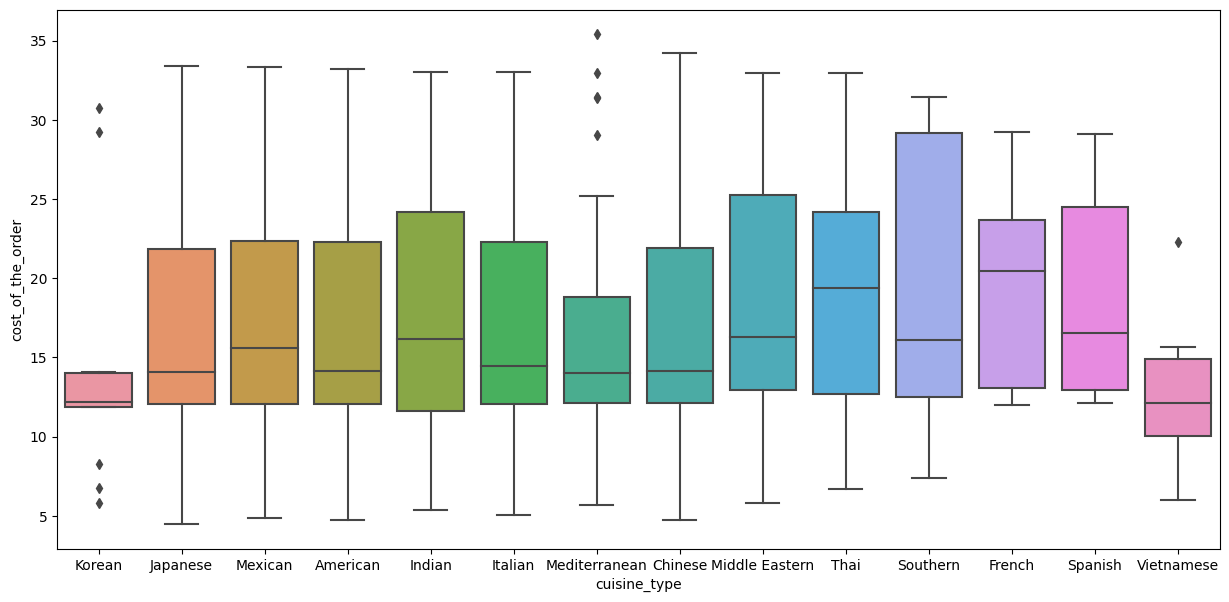

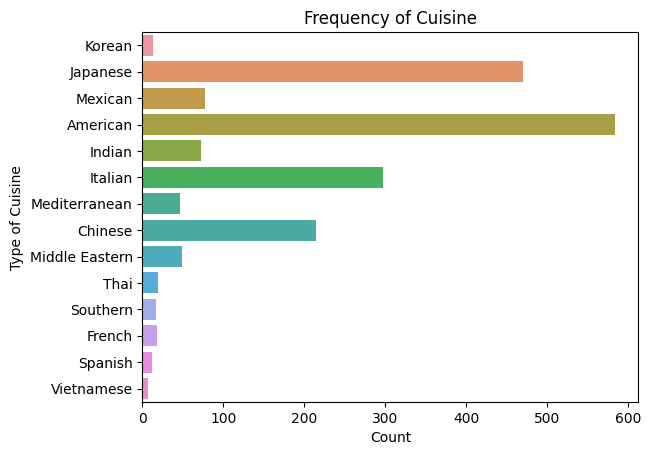

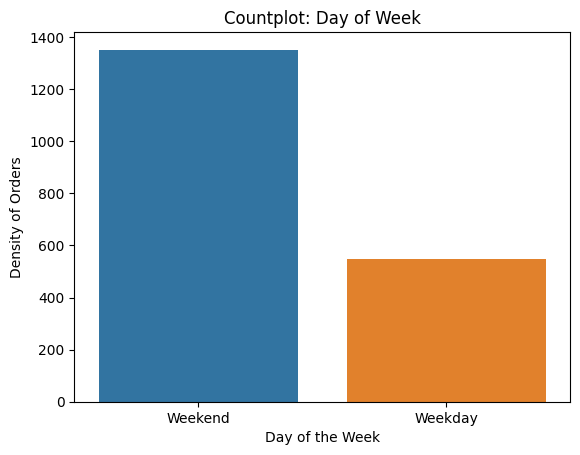

In [ ]:
# Write the code here
# Histogram for 'cost_of_the_order'
sns.histplot(data=df, x='cost_of_the_order', hue='cuisine_type', kde=True)
plt.xlabel('Cost of the Order')
plt.title('Histogram: Cost')
plt.show()
g = sns.FacetGrid(df, col="cuisine_type")
g.map(sns.histplot, "cost_of_the_order");
plt.show()
# Histogram for 'food_preparation_time'
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.xlabel('Time to Prepare Food')
plt.title('Histogram: Food Prep Time')
plt.show()
#Histogram for 'delivery_time'
sns.histplot(data=df, x='delivery_time', kde=True)
plt.xlabel('Time to Deliver Food')
plt.title('Histogram: Delivery Time')
plt.show()
# Boxplot for 'cost_of_the_order'
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.show()
# Countplot for 'cuisine_type'
sns.countplot(data=df, y='cuisine_type')
plt.ylabel('Type of Cuisine')
plt.xlabel('Count')
plt.title('Frequency of Cuisine')
plt.show()
# Countplot for 'day_of_the_week'
sns.countplot(data=df, x='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Density of Orders')
plt.title('Countplot: Day of Week')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
I made a few observations from the data. The cost_of_the_order histogram is skewed to the right whereas the data for food_preparation_time is symmetrical, and the delivery_time data is skewed to the left. French cuisine had the highest average cost and vietnamese and korean shared the lowest average cost. However; mediterranean food had the most expensive order in the data. American cuisine was the most popular cuisine ordered, followed by Japanese, Italian, and Chinese in that order. Customers ordered much more frequently on weekends than they did on weekdays.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

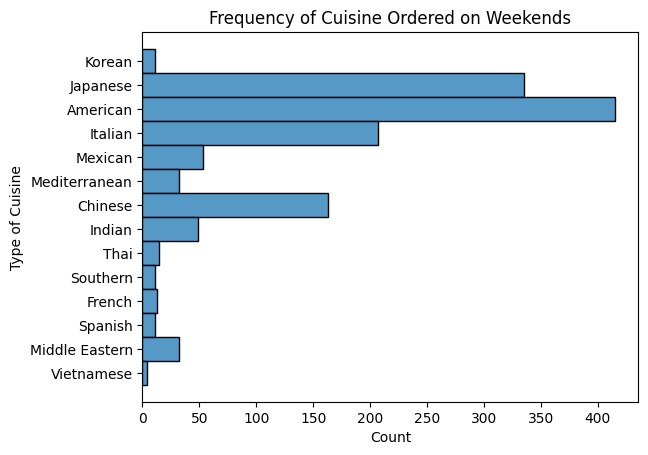

In [ ]:
# Write the code here
plt.ylabel('Type of Cuisine')
plt.title('Frequency of Cuisine Ordered on Weekends')
sns.histplot(data=df[df['day_of_the_week']=='Weekend'], y='cuisine_type')
plt.show()

#### Observations:
American Cuisine is the most poular cuisine on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
total_orders = df['cost_of_the_order'].count()
more_than_20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].count()
print(round((more_than_20 / total_orders) * 100))


29


#### Observations:
29% of the orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
The mean order delivery time is 24.161749

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:


1.   Top 1 most frequent customer id: 52832, Number of orders placed: 13
2.   Top 2 most frequent customer id: 47440, Number of orders placed: 10
3.   Top 3 most frequent customer id: 83287, Number of orders placed: 9





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


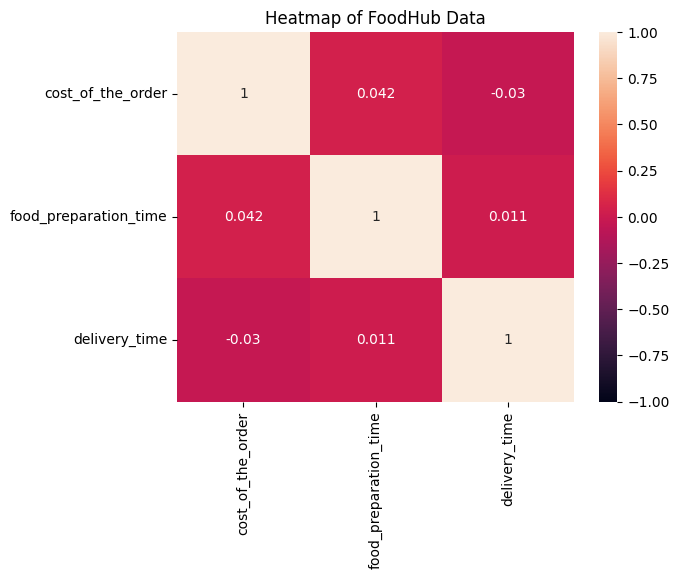

In [ ]:
# Write the code here
plt.title('Heatmap of FoodHub Data')
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Observations:
According to the heatmap, there are very weak correlations between the variables. The strongest correlation is between the cost of the order and food prep time but the correlation is not strong enough to conclude that one affects the other.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
from zmq import NULL
# Write the code here
# Detect missing values
missing_vals = ["Not given"]
missing = df.isin(missing_vals)
# Fill 'Not given' values with 0
df = df.mask(missing, NULL)
# Create new dataframe without the missing ratings
none_missing = df[df.rating != 0]
# Convert rating column data type from object to int64
none_missing['rating'] = none_missing['rating'].astype('int64')
print(none_missing.restaurant_name.value_counts())
# Only top four restaurants have enough ratings for promo
logical_condition_1 = none_missing['restaurant_name'] == 'Shake Shack'
shake_shack_total_ratings = none_missing[logical_condition_1].shape[0]
shake_shack_ratings_sum = none_missing[logical_condition_1].rating.sum()
shake_shack_avg = shake_shack_ratings_sum / shake_shack_total_ratings
print('Shake Shack has a total of ' + str(shake_shack_total_ratings) + ' ratings. The average rating is ' + str(round(shake_shack_avg, 2)) + '. So, Shake Shack fulfills the criteria to get the promotional offer!!')
logical_condition_2 = none_missing['restaurant_name'] == 'The Meatball Shop'
mb_total_ratings = none_missing[logical_condition_2].shape[0]
mb_ratings_sum = none_missing[logical_condition_2].rating.sum()
mb_avg = mb_ratings_sum / mb_total_ratings
print('The Meatball Shop has a total of ' + str(mb_total_ratings) + ' ratings. The average rating is ' + str(round(mb_avg, 2)) + '. So, The Meatball Shop fulfills the criteria to get the promotional offer!!')
logical_condition_3 = none_missing['restaurant_name'] == 'Blue Ribbon Sushi'
sushi_total_ratings = none_missing[logical_condition_3].shape[0]
sushi_ratings_sum = none_missing[logical_condition_3].rating.sum()
sushi_avg = sushi_ratings_sum / sushi_total_ratings
print('Blue Ribbon Sushi  has a total of ' + str(sushi_total_ratings) + ' ratings. The average rating is ' + str(round(sushi_avg, 2)) + '. So, Blue Ribbon Sushi fulfills the criteria to get the promotional offer!!')
logical_condition_4 = none_missing['restaurant_name'] == 'Blue Ribbon Fried Chicken'
chicken_total_ratings = none_missing[logical_condition_4].shape[0]
chicken_ratings_sum = none_missing[logical_condition_4].rating.sum()
chicken_avg = chicken_ratings_sum / chicken_total_ratings
print('Blue Ribbon Fried Chicken  has a total of ' + str(chicken_total_ratings) + ' ratings. The average rating is ' + str(round(chicken_avg, 2)) + '. So, Blue Ribbon Fried Chicken fulfills the criteria to get the promotional offer!!')

Shake Shack                    133
The Meatball Shop               84
Blue Ribbon Sushi               73
Blue Ribbon Fried Chicken       64
RedFarm Broadway                41
                              ... 
Philippe Chow                    1
Dirty Bird To Go (archived)      1
The MasalaWala                   1
Kambi Ramen House                1
'wichcraft                       1
Name: restaurant_name, Length: 156, dtype: int64
Shake Shack has a total of 133 ratings. The average rating is 4.28. So, Shake Shack fulfills the criteria to get the promotional offer!!
The Meatball Shop has a total of 84 ratings. The average rating is 4.51. So, The Meatball Shop fulfills the criteria to get the promotional offer!!
Blue Ribbon Sushi  has a total of 73 ratings. The average rating is 4.22. So, Blue Ribbon Sushi fulfills the criteria to get the promotional offer!!
Blue Ribbon Fried Chicken  has a total of 64 ratings. The average rating is 4.33. So, Blue Ribbon Fried Chicken fulfills the criteri

<ipython-input-142-400d8d273749>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none_missing['rating'] = none_missing['rating'].astype('int64')


#### Observations:

1. Shake Shack has a total of 133 ratings with an average of 4.28, so it fulfills
the criteria for the promotional offer.
2. The Meatball Shop has a total of 84 ratings with an average of 4.51, so it fulfills the criteria for the promotional offer.
3. Blue Ribbon Sushi has a total of 73 ratings with an average of 4.22, so it fulfills the criteria for the promotional offer.
4. Blue Ribbon Fried Chicken has a total of 64 ratings with an average of 4.33, so it fulfills the criteria for the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
logical_index_1 = df['cost_of_the_order'] > 20
logical_index_2 = df['cost_of_the_order'] <= 20
greater_than_20 = df[logical_index_1]
less_than_or_equal_to_20 = df[logical_index_2]
logical_index_3 = less_than_or_equal_to_20['cost_of_the_order'] > 5
other_orders = less_than_or_equal_to_20[logical_index_3]
net_revenue = (greater_than_20['cost_of_the_order'].sum() * 0.25) + (other_orders['cost_of_the_order'].sum() * 0.15)
net_revenue


6166.303

#### Observations:
The net revenue generated by the company across all orders is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df.food_preparation_time + df.delivery_time
more_than_60 = df['total_time'] > 60
total_over_60 = df[more_than_60].shape[0]
(total_over_60 / df.shape[0]) * 100

10.537407797681771

#### Observations:
10.5% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
weekend = df['day_of_the_week'] == 'Weekend'
weekday = df['day_of_the_week'] == 'Weekday'
end = df[weekend]
day = df[weekday]
DT_end = end['delivery_time'].sum() / end.shape[0]
DT_day = day['delivery_time'].sum() / day.shape[0]
print(str(DT_end))
print(str(DT_day))
print(str(DT_day - DT_end))

22.4700222057735
28.340036563071298
5.870014357297798


#### Observations:
The mean delivery time during the weekend is 22.5 minutes and the mean delivery time during the weekday is 28.3 minutes. So the mean delivery time during the weekday is 5.8 minutes longer than it is during the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The bulk of orders are made during the weekends vs. the weekdays even though there are more days in weekdays than in weekends.
*  Delivery time on average takes longer on weekends than on weekdays.
*  American cuisine is the most popular cuisine, followed by Japanese, Italian, and Chinese.
*  There is almost no or a very weak correlation between food preparation time, delivery time, and cost of the order, suggesting that they do not affect each other.

### Recommendations:

*  Based on the answers to the questions and the conclusions from the data, I suggest increasing the number of drivers on the weekends to accomodate the influx of orders over the weekend.
*  I also reccommend incentivizing customers to rate their orders by providing some future discount through number of reviews placed at different restaurants since only four restaurants had more than 50 ratings.

---